# Tracking the Oscillations of the Santa Cruz Coast
##### 1) Download this data set [LINK] that lists some tidal measurements Santa Cruz in January and February 2022. In your Jupyter notebook, define an oscillatory function in Python to describe the intra- and inter-day variations in the tide.

##### 2) Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.0762m. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF.

##### 3) Next, have your notebook subtract off the best fit function from the data and plot the residuals. Assess graphically and mathematically deviations of the measured tidal data from the model. Plot a histogram of the residuals and measure the standard deviation. Is the scatter in the data larger than the assumed experimental error? Estimate the intrinsic scatter in the data after accounting for the assumed measurement error. Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

##### 4) During the first high-tide of January 14, the tsunami from the underwater eruption of the Hunga Tonga-Hunga Ha'apai volcano reached the shores of Santa Cruz. The tsunami increased water levels near high tide by about 2ft. How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model? Add a single 2ft outlier to the histogram of data and replot it as part of your Jupyter notebook.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from astropy.io import ascii

In [2]:
def ReadFile():

    # Read and import all the data to 'tide_data'
    tide_data = ascii.read('ASTR19_F25_group_project_data.txt')
    return tide_data

In [3]:
def DayTimeConverter(day_str,time_str):

    day = int(day_str)                             # Save the Day number as an int
    hours, minutes = map(int, time_str.split(':')) # Takes the given 00:00 time and splits it into the ints 00 & 00 for hours and minutes
    total_days = day + hours/24 + minutes/(24*60)  # Calculate the fractional time. Basically: 1d 12hr 13min --> 1.509d

    # Return astropy Time Object
    return (total_days)                

In [4]:
def FtoMeters(height_str):
    
    # Convert the stinky feet, to the real measurement system then send back the value
    return (0.3048*float(height_str))        

In [5]:
def model_f(Time_Total,a,b,c,d,g,i):
    
    return i + a*np.cos(b*Time_Total + c)*np.cos(g*Time_Total + d)

In [6]:
def Figure():
    
    # Print Out File Contents and save them to tide_data
    tide_data = ReadFile()
    
    # Create the figure
    plt.figure(facecolor='grey',figsize=(40,10))
    
    # Set the facecolor for the figure
    ax = plt.subplot(1,1,1,aspect=1, facecolor='black')
    ax.grid(linestyle="--", linewidth=0.5, color="0.3", zorder=-10)

    # Send out the Data to be Plotted
    Plot(tide_data)

    # Add Tick Labels
    ax.set_yticks(np.arange(-1.0, 3.0, .5))
    plt.xticks(np.arange(0.0, 42, 1.0))
    
    # Label the Axes
    plt.xlabel('Days')
    plt.ylabel('Height (Meters)')
    
    # Save the figure
    plt.savefig('surfs_up.pdf',bbox_inches='tight',dpi=800)

In [7]:
def Plot(tide_data):

    # Initialize the lists for the data
    TimeE = []
    TimeL = []
    heightE = []
    heightL = []
    Time_Total = []
    height_Total = []

    sig = 0.0762
    y_err = np.full(len(tide_data),sig)
    
    # Iterate through every row, one by one
    for i in range(0,len(tide_data),2):

        # Calculate and add values to the arrays one set of values at a time
        TimeE.append(DayTimeConverter(tide_data['col1'][i] - 1,tide_data['col2'][i]))   # Grab an even date & time from a specific row
        TimeL.append(DayTimeConverter(tide_data['col1'][i] - 1,tide_data['col2'][i+1])) # Grab an odd date & time from a specific row
        heightE.append(FtoMeters(tide_data['col3'][i]))                                 # Grab the even height from a specific row
        heightL.append(FtoMeters(tide_data['col3'][i+1]))                               # Grab the odd height from a specific row

        # Create lists that have all of the data, not just a part
        Time_Total.append(DayTimeConverter(tide_data['col1'][i] - 1,tide_data['col2'][i]))
        Time_Total.append(DayTimeConverter(tide_data['col1'][i] - 1,tide_data['col2'][i+1]))
        height_Total.append(FtoMeters(tide_data['col3'][i]))
        height_Total.append(FtoMeters(tide_data['col3'][i+1]))

    # Perform the fit
    params, params_cov = optimize.curve_fit(model_f,Time_Total,height_Total,sigma=y_err,p0=[1.2,0.2,3.3,0,0.2,0.8])
    x = np.array(Time_Total)    
    a_fit = params[0]
    b_fit = params[1]
    c_fit = params[2]
    d_fit = params[3]
    g_fit = params[4]
    i_fit = params[5]    
    print(a_fit,b_fit,c_fit,d_fit,g_fit,i_fit)    
    height_fit = i_fit + a_fit*np.cos(b_fit*x + c_fit)*np.cos(g_fit*x + d_fit)
    
    plt.plot(Time_Total,height_Total, '--', color='midnightblue') # Plot the data as a connected linear line
    plt.plot(Time_Total,height_fit,color='fuchsia',label='fit')   # Plot the line of best fit
    plt.plot(TimeE,heightE, 'o', color='cyan')                    # Plot using the even values for time and height
    plt.plot(TimeL,heightL, 'o', color='orange')                  # Plot using the odd values for time and height 

    # Show a legend
    plt.legend(loc=0,frameon=False)

In [8]:
def main():                        

    # plt.style.use("./astr19_matplotlib_defaults.txt")
    
    # Create the Figure and plot the data and save the file
    Figure()

0.6284126886875813 0.19722098687448958 -0.7905707901912092 -4.294146836781381 0.2300233621921236 1.0545839741851708


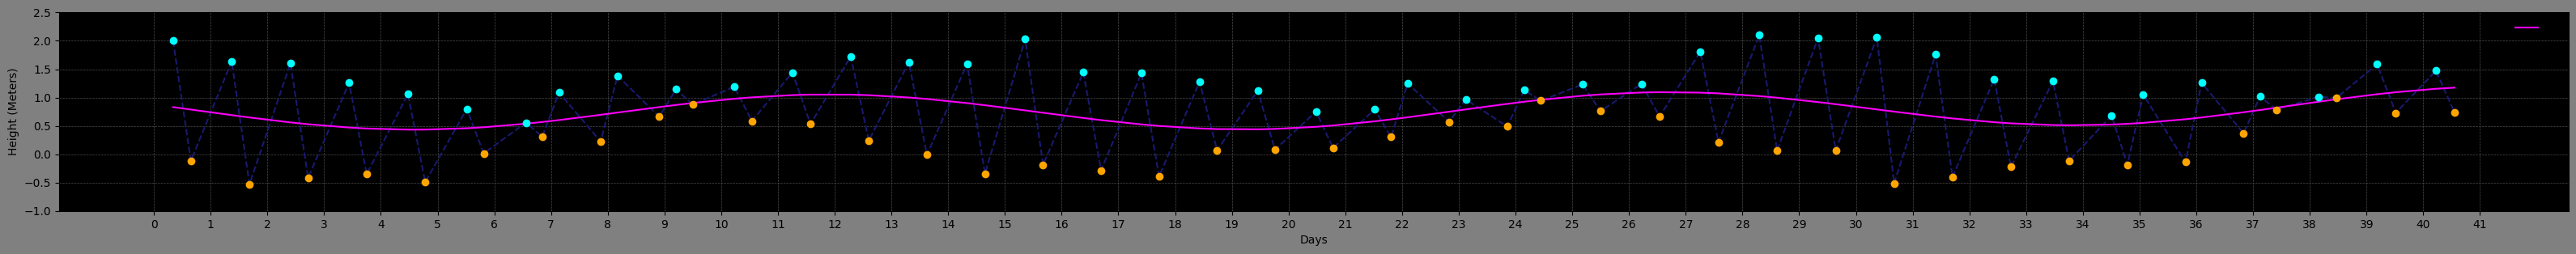

In [9]:
if __name__=="__main__":
    main()

# Residuals & Intrinisic Scatter & Tsunami Significance

In [10]:
t_data = ReadFile()

time_total = []
height_total = []

for i in t_data:
    t = DayTimeConverter(i["col1"] - 1, i["col2"])

    try:
        t_day = t.to(u.day).value # if its in astropy data typ
    except AttributeError:
        t_day = t #if its already a float

    h = FtoMeters(i["col3"])
    height_total.append(float(h))
    time_total.append(t_day)

time_total = np.array(time_total)
height_total = np.array(height_total)

time_total[:5], height_total[:5]


(array([0.33819444, 0.65069444, 1.37152778, 1.68402778, 2.40625   ]),
 array([ 2.002536, -0.118872,  1.639824, -0.530352,  1.603248]))

In [11]:
from scipy import optimize

measurement_err = .25 * .3048 #ft to meters maybe add a function if its used more 
height_error = np.ones_like(height_total) * measurement_err

first_pick = [1.0, 1.0, 0.0, 1.0, 0.2, 0.0]

fit_params, fit_cov = optimize.curve_fit(
    model_f,
    time_total,
    height_total,
    p0=first_pick,
    sigma=height_error,
    absolute_sigma=True #67
)

fit_params

array([0.14911125, 1.04709146, 0.16636329, 0.77536526, 0.21840545,
       0.75179595])

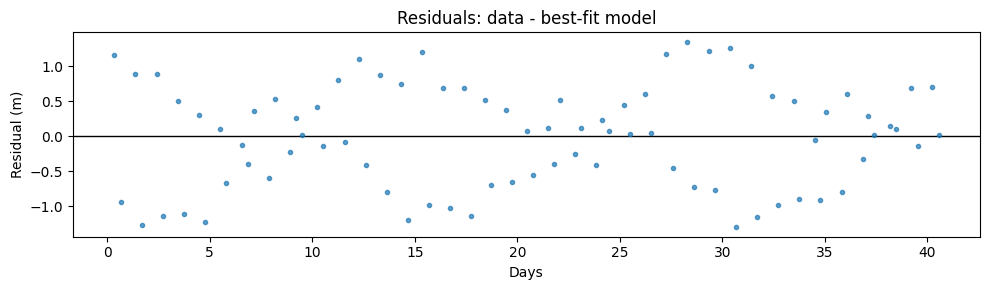

In [12]:
m_height = model_f(time_total, *fit_params)
residuals = height_total - m_height

fig, ax = plt.subplots(figsize=(10,3))
ax.axhline(0.0, color="k", linewidth = 1)
ax.plot(time_total, residuals, ".", alpha=0.7)

ax.set_xlabel("Days")
ax.set_ylabel("Residual (m)")
ax.set_title("Residuals: data - best-fit model")

fig.tight_layout()
fig.savefig("tides_residuals.pdf", dpi = 300, bbox_inches = "tight")
plt.show()

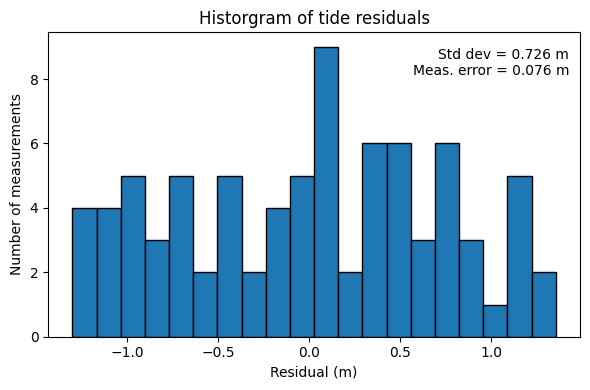

RESID_SIGMA_M = 0.726384 m
RESID_SIGMA_FT = 2.383151 ft


In [13]:
resid_sigma = np.std(residuals, ddof=1)
num_bins = 20 #should be clear enough but add more if not

fig,ax = plt.subplots(figsize=(6,4))
ax.hist(residuals, bins=num_bins,edgecolor="black")

ax.set_xlabel("Residual (m)")
ax.set_ylabel("Number of measurements")
ax.set_title("Historgram of tide residuals")

text = f"Std dev = {resid_sigma:.3f} m\nMeas. error = {measurement_err:.3f} m"
ax.text(.98,.95,text,transform=ax.transAxes,ha="right",va="top")

fig.tight_layout()
fig.savefig("tides_residuals_hist.pdf",dpi=300,bbox_inches="tight")
plt.show()

print(f"RESID_SIGMA_M = {resid_sigma:.6f} m")
print(f"RESID_SIGMA_FT = {resid_sigma/0.3048:.6f} ft")


### Scatter of residuals vs measurement error

From the histogram above, the standard deviation of the residuals is about 0.726384 m
which is approximately 2.383151 ft (divide by 0.3048 to convert from meters to feet).

The assumed measurement error on each tide height is **0.25 ft**,  
which is about **0.076 m**.

Because 0.726384 m is larger than **0.076 m**, the overall scatter of the data
is larger than we would expect from measurement error alone.  
This means there is extra variability in the tides that is not explained
just by the experimental uncertainty.


In [14]:
intrinsic_sigma = np.sqrt(max(0.0, resid_sigma**2 - measurement_err**2))

print(f"INTRINSIC_SIGMA_M  = {intrinsic_sigma:.6f} m")
print(f"INTRINSIC_SIGMA_FT = {intrinsic_sigma/0.3048:.6f} ft")


INTRINSIC_SIGMA_M  = 0.722376 m
INTRINSIC_SIGMA_FT = 2.370002 ft


# The intrinsic scatter of the tides (after subing the measurement error) is ~ 0.722376 m, which is ~ 2.370002 ft

In [15]:
tsunami_height_ft = 2.0
tsunami_height_m = tsunami_height_ft * .3048

z_using_residuals = tsunami_height_m / resid_sigma
z_using_intrinsic = tsunami_height_m / intrinsic_sigma if intrinsic_sigma > 0 else np.nan

print(f"Z_USING_RESID  = {z_using_residuals:.3f} sigma")
print(f"Z_USING_INTRIN = {z_using_intrinsic:.3f} sigma")

Z_USING_RESID  = 0.839 sigma
Z_USING_INTRIN = 0.844 sigma


# A 2 ft tsunami corresponds to about 0.839 sigma relative to the overall residual scatter, and about 0.844 sigma relative to the intrinsic scatter.

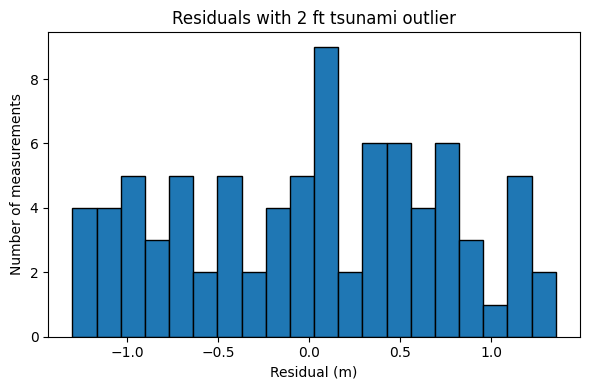

In [16]:
residuals_with_tsunami = np.append(residuals, tsunami_height_m)

fig,ax = plt.subplots(figsize=(6,4))
ax.hist(residuals_with_tsunami,bins=num_bins,edgecolor="black")

ax.set_xlabel("Residual (m)")
ax.set_ylabel("Number of measurements")
ax.set_title("Residuals with 2 ft tsunami outlier")

fig.tight_layout()
fig.savefig("tides_residuals_hist_with_tsunami.pdf", dpi = 300, bbox_inches="tight")
plt.show()